In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lasyasreeb21ai033","key":"b23c258b91d1d2cd94272e1f48f59bf9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [3]:
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown


In [4]:
!unzip -q plantdisease.zip -d plant_disease

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 15
EPOCHS = 10

DATASET_PATH = 'plant_disease/PlantVillage'

In [6]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=15
)

train_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [ ]:
# def attention_block(inputs):
#     attention = layers.GlobalAveragePooling2D()(inputs)
#     attention = layers.Dense(inputs.shape[-1] // 8, activation='relu')(attention)
#     attention = layers.Dense(inputs.shape[-1], activation='sigmoid')(attention)
#     attention = layers.Reshape((1, 1, inputs.shape[-1]))(attention)
#     return layers.multiply([inputs, attention])

# def build_model(input_shape, num_classes):
#     inputs = Input(shape=input_shape)

#     x = layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
#     x = layers.MaxPooling2D((2,2))(x)

#     x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
#     x = layers.MaxPooling2D((2,2))(x)

#     x = layers.Conv2D(128, (3,3), activation='relu', padding='same')(x)
#     x = layers.MaxPooling2D((2,2))(x)

#     x = attention_block(x)

#     x = layers.GlobalAveragePooling2D()(x)
#     x = layers.Dense(128, activation='relu')(x)
#     x = layers.Dropout(0.5)(x)
#     outputs = layers.Dense(num_classes, activation='softmax')(x)

#     model = models.Model(inputs, outputs)
#     return model

# model = build_model((*IMAGE_SIZE, 3), NUM_CLASSES)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 64, 64, 32)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 32, 32, 64)     │              0 │ conv2d_4[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 128)    │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 16, 16, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_5[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 16)             │          2,064 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 128)            │          2,176 │ dense_4[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 1, 1, 128)      │              0 │ dense_5[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_1 (Multiply)     │ (None, 16, 16, 128)    │              0 │ max_pooling2d_5[0][0], │
│                           │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ multiply_1[0][0]       │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 128)            │         16,512 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ dense_6[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 15)             │          1,935 │ dropout_1[0][0]        │
└──────────────────────

 Total params: 115,935 (452.87 KB)

 Trainable params: 115,935 (452.87 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# history = model.fit(
#     train_gen,
#     validation_data=val_gen,
#     epochs=EPOCHS
# )

Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 780s 2s/step - accuracy: 0.1964 - loss: 2.4464 - val_accuracy: 0.4289 - val_loss: 1.7483
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 769s 1s/step - accuracy: 0.4694 - loss: 1.6214 - val_accuracy: 0.6402 - val_loss: 1.0834
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 779s 1s/step - accuracy: 0.6022 - loss: 1.2178 - val_accuracy: 0.6504 - val_loss: 1.0357
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 747s 1s/step - accuracy: 0.6549 - loss: 1.0276 - val_accuracy: 0.7057 - val_loss: 0.8320
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 742s 1s/step - accuracy: 0.7018 - loss: 0.8935 - val_accuracy: 0.7787 - val_loss: 0.6730
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 744s 1s/step - accuracy: 0.7215 - loss: 0.8343 - val_accuracy: 0.7982 - val_loss: 0.6085
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.7406 - loss: 0.7501 - val_accuracy: 0.8064 - val_loss: 0.5478
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 740s 1s/step - accuracy: 0.7638 - loss: 0.6974 - val_accu

In [ ]:
# loss, accuracy = model.evaluate(val_gen)
# print(f"Validation Accuracy: {accuracy * 100:.2f}%")

129/129 ━━━━━━━━━━━━━━━━━━━━ 73s 566ms/step - accuracy: 0.8565 - loss: 0.4502
Validation Accuracy: 85.40%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


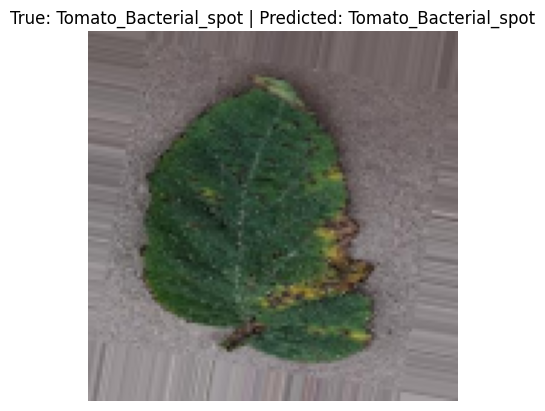

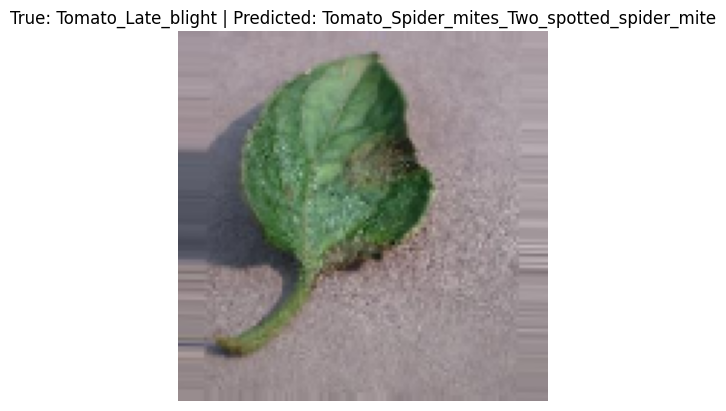

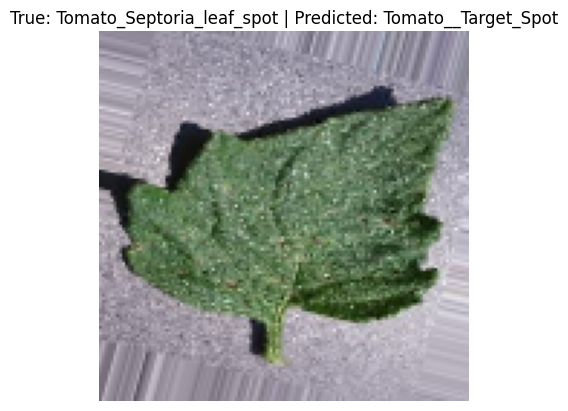

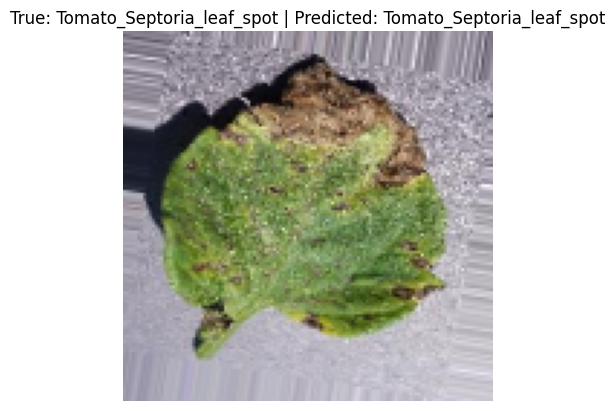

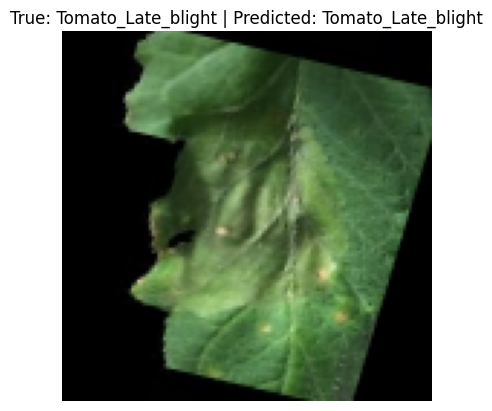

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# x_batch, y_batch = next(val_gen)

# predictions = model.predict(x_batch)
# predicted_classes = np.argmax(predictions, axis=1)
# true_classes = np.argmax(y_batch, axis=1)
# class_labels = list(train_gen.class_indices.keys())

# for i in range(5):
#     plt.imshow(x_batch[i])
#     plt.title(f"True: {class_labels[true_classes[i]]} | Predicted: {class_labels[predicted_classes[i]]}")
#     plt.axis('off')
#     plt.show()


In [7]:
from tensorflow.keras import layers, models, Input

def attention_block(inputs):
    channels = inputs.shape[-1]

    attention = layers.GlobalAveragePooling2D()(inputs)
    attention = layers.Dense(channels // 4, activation='relu')(attention)  # More expressive
    attention = layers.Dense(channels, activation='sigmoid')(attention)
    attention = layers.Reshape((1, 1, channels))(attention)

    return layers.Multiply()([inputs, attention])

def build_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Block 1
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = attention_block(x)

    # Block 2
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = attention_block(x)

    # Block 3
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = attention_block(x)

    # Block 4 (optional deeper layer)
    x = layers.Conv2D(256, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = attention_block(x)

    # Classification head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model

model = build_model((*IMAGE_SIZE, 3), NUM_CLASSES)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 32)             │              0 │ max_pooling2d[0][0]    │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 8)              │            264 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │            288 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1, 1, 32)       │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 64, 64, 32)     │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 64, 64, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 64)             │              0 │ max_pooling2d_1[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 16)             │          1,040 │ global_average_poolin… │
├──────────────────────

 Total params: 469,287 (1.79 MB)

 Trainable params: 468,327 (1.79 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 141s 243ms/step - accuracy: 0.5073 - loss: 1.5380 - val_accuracy: 0.3423 - val_loss: 2.7396
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 113s 218ms/step - accuracy: 0.7680 - loss: 0.7167 - val_accuracy: 0.6279 - val_loss: 1.3839
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 113s 219ms/step - accuracy: 0.8585 - loss: 0.4421 - val_accuracy: 0.5653 - val_loss: 1.6319
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 112s 216ms/step - accuracy: 0.8881 - loss: 0.3494 - val_accuracy: 0.6084 - val_loss: 1.8851
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 142s 216ms/step - accuracy: 0.9020 - loss: 0.2955 - val_accuracy: 0.8246 - val_loss: 0.5160
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 132s 256ms/step - accuracy: 0.9282 - loss: 0.2286 - val_accuracy: 0.9139 - val_loss: 0.2584
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 112s 216ms/step - accuracy: 0.9326 - loss: 0.2153 - val_accuracy: 0.7712 - val_loss: 1.0013
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 144s 221ms/step - accuracy: 0.9399 -

In [9]:
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

129/129 ━━━━━━━━━━━━━━━━━━━━ 22s 166ms/step - accuracy: 0.8994 - loss: 0.2896
Validation Accuracy: 89.81%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


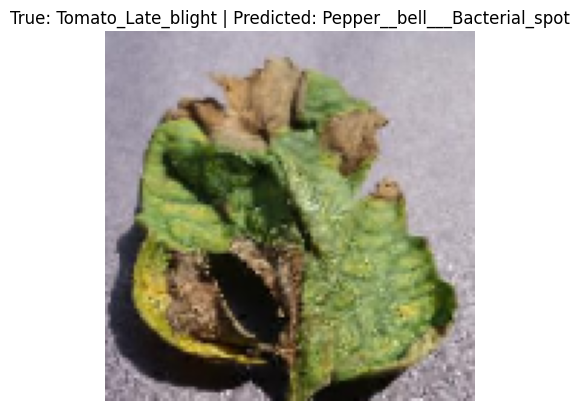

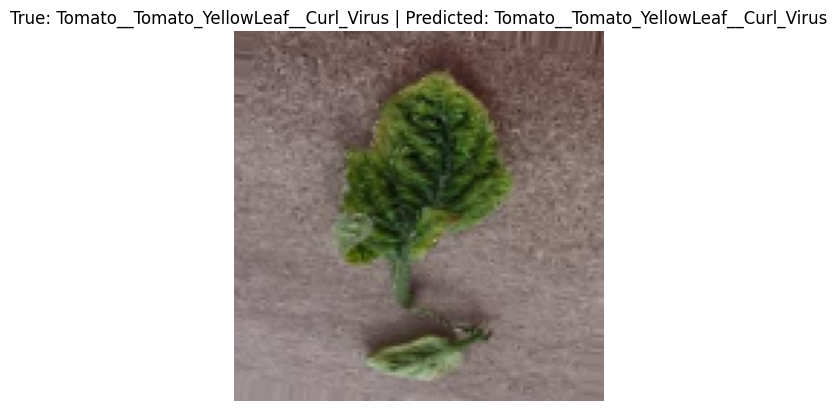

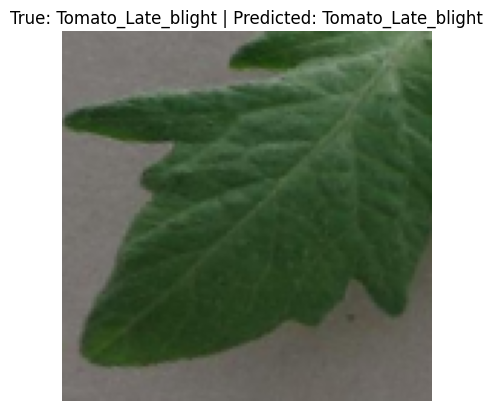

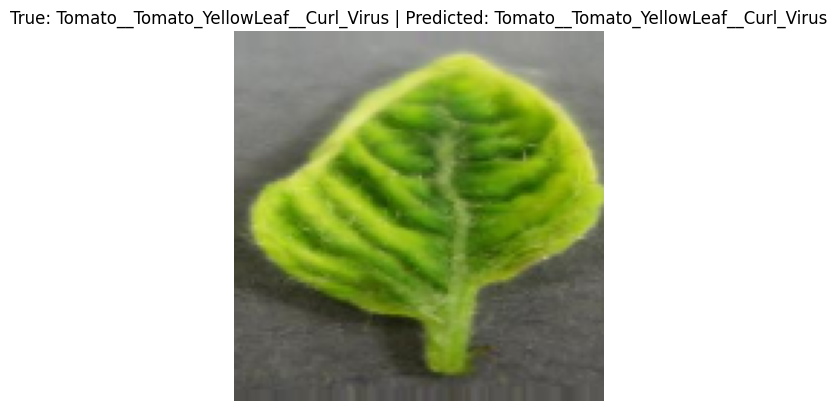

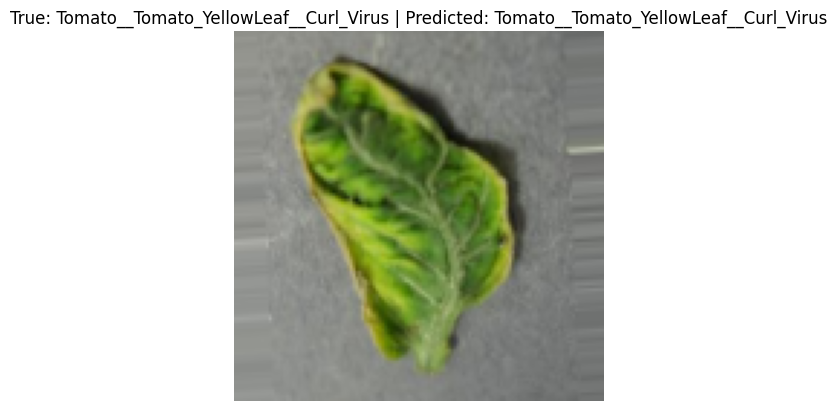

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_batch, y_batch = next(val_gen)

predictions = model.predict(x_batch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_batch, axis=1)
class_labels = list(train_gen.class_indices.keys())

for i in range(5):
    plt.imshow(x_batch[i])
    plt.title(f"True: {class_labels[true_classes[i]]} | Predicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()
